<a href="https://colab.research.google.com/github/Showcas/NLP/blob/main/05_IntroductionToHFandLoRA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing with LLMs

In the rapidly evolving field of NLP and LLMs, Hugging Face 🤗 provides access to state-of-the-art AI models and making it easier for developers, researchers, and organizations to integrate advanced NLP capabilities into their applications.

The most important parts of the HF ecosystem include:

- 🤗 Model Hub – A repository of thousands of open-source ML models.
- 🤗 Datasets – A vast collection of high-quality NLP datasets.
- 🤗 Tokenizers – Efficient and customizable tokenization methods for text processing.
- 🤗 Accelerate – Tools for optimizing and scaling model training.
- 🤗 PEFT (Parameter-Efficient Fine-Tuning) – Techniques like LoRA for efficient model adaptation.
- 🤗 Spaces – A platform to deploy and share AI applications.

and more.

In this notebook we want to provide you with a quickstart and a basic overview on how to use the ecosystem. We will load a model, learn how to fine tune a model using Parameter-Efficient Fine-Tuning (PEFT) methods and evaluate them.

This notebook is influenced by the following hugging face notebook: https://github.com/huggingface/notebooks/blob/main/transformers_doc/en/quicktour.ipynb

## 0. Setup

Before you begin, make sure you have all the necessary libraries installed:

In [1]:
!pip install transformers bitsandbytes accelerate peft datasets torch torchinfo matplotlib pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 32.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

You can also run different functions with a tensorflow backend. But in the scope of this notebook we focus on the pytorch backend.

## 1. Quickstart

### 1.1 Pipeline

The pipeline() is the easiest and fastest way to use a pretrained model for inference. You can use the pipeline() out-of-the-box for many tasks across different modalities, some of which are shown in the table below:

| **Task**                     | **Description**                                                                                              | **Modality**    | **Pipeline identifier**                       |
|------------------------------|--------------------------------------------------------------------------------------------------------------|-----------------|-----------------------------------------------|
| Text classification          | assign a label to a given sequence of text                                                                   | NLP             | pipeline(task=“sentiment-analysis”)           |
| Text generation              | generate text given a prompt                                                                                 | NLP             | pipeline(task=“text-generation”)              |
| Summarization                | generate a summary of a sequence of text or document                                                         | NLP             | pipeline(task=“summarization”)                |
| Image classification         | assign a label to an image                                                                                   | Computer vision | pipeline(task=“image-classification”)         |
| Image segmentation           | assign a label to each individual pixel of an image (supports semantic, panoptic, and instance segmentation) | Computer vision | pipeline(task=“image-segmentation”)           |
| Object detection             | predict the bounding boxes and classes of objects in an image                                                | Computer vision | pipeline(task=“object-detection”)             |
| Audio classification         | assign a label to some audio data                                                                            | Audio           | pipeline(task=“audio-classification”)         |
| Automatic speech recognition | transcribe speech into text                                                                                  | Audio           | pipeline(task=“automatic-speech-recognition”) |
| Visual question answering    | answer a question about the image, given an image and a question                                             | Multimodal      | pipeline(task=“vqa”)                          |
| Document question answering  | answer a question about a document, given an image and a question                                            | Multimodal      | pipeline(task="document-question-answering")  |
| Image captioning             | generate a caption for a given image                                                                         | Multimodal      | pipeline(task="image-to-text")                |

**Note:** For a complete list of available tasks, check out the [pipeline API reference](https://huggingface.co/docs/transformers/main/en/./main_classes/pipelines).

The pipeline() downloads and caches a default pretrained model and tokenizer for sentiment analysis. Now you can use the `classifier` on your target text:

In [2]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cuda:0


In [3]:
classifier("We are very happy to show you the 🤗 Transformers library.")

[{'label': 'POSITIVE', 'score': 0.9997795224189758}]

Depending on the task it takes the default model for the pipeline and solves the task. To find out what model was used use the following:

In [4]:
print(classifier.model.name_or_path)

distilbert/distilbert-base-uncased-finetuned-sst-2-english


As displayed in the table above, we can use the pipeline on a variety of tasks.

#### TASK 5.1

Use the pipeline function to generate text using the pythia 70M model.

1. Load the model using the `AutoModelForCausalLM` from `transformers`.
2. Load the tokenizer usint the `AutoTokenizer` from `transformers`.
3. Define the pipeline with the model and tokenizer.
4. Use the generator to generate `150` tokens after the given prompt.
5. Print out the generated Text.

In [5]:
prompt = "The five best things in the NLP lecture this semester were:\n"
model_name = "EleutherAI/pythia-70m"

from transformers import AutoModelForCausalLM, AutoTokenizer

### IMPLEMENT YOUR SOLUTION HERE ###
model = AutoModelForCausalLM.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

generator = pipeline("text-generation", model=model, tokenizer=tokenizer)

generated_text = generator(prompt, max_new_tokens=150, num_return_sequences=1)[0]['generated_text']

print(generated_text)

config.json:   0%|          | 0.00/567 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/166M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/396 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

Device set to use cuda:0
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


The five best things in the NLP lecture this semester were:

1. The first two lectures were the first two lectures, and the second one was the first one.

2. The third lectures were the first two lectures, and the fourth lecture was the first one.

3. The fourth lectures were the first two lectures, and the fifth lecture was the first one.

4. The fifth lectures were the first two lectures, and the sixth lecture was the first one.

5. The sixth lectures were the first two lectures, and the seventh lecture was the first one.

6. The seventh lectures were the first two lectures, and the eighth lecture was the first one.

7. The eighth lectures were the first two lectures, and the ninth lecture was


### 1.2 AutoClass

Under the hood, the `AutoModelForCausalLM` and `AutoTokenizer` classes work together to power the `pipeline` you used above. An `AutoClass` is a shortcut that automatically retrieves the architecture of a pretrained model from its name or path. You only need to select the appropriate `AutoClass` for your task and it's associated preprocessing class.

#### AutoTokenizer

The `AutoTokenizer` for example loads the correct tokenizer for the given model and we can observe the encodings for different models:

In [7]:
from transformers import AutoTokenizer

pythia = "EleutherAI/pythia-70m"
gpt2 = "gpt2"
falcon_7b = "tiiuae/falcon-7b"

pythia_tokenizer = AutoTokenizer.from_pretrained(pythia)
gpt2_tokenizer = AutoTokenizer.from_pretrained(gpt2)
falcon_7b_tokenizer = AutoTokenizer.from_pretrained(falcon_7b)


text = "This text will be encoded by different tokenizers to show the differences in tokenization."

print(f"Pythia tokenizer: {pythia_tokenizer(text)}")
print(f"GPT-2 tokenizer: {gpt2_tokenizer(text)}")
print(f"Falcon-7B tokenizer: {falcon_7b_tokenizer(text)}")

Pythia tokenizer: {'input_ids': [1552, 2505, 588, 320, 16202, 407, 1027, 10669, 14460, 281, 921, 253, 3910, 275, 10669, 1320, 15], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}
GPT-2 tokenizer: {'input_ids': [1212, 2420, 481, 307, 30240, 416, 1180, 11241, 11341, 284, 905, 262, 5400, 287, 11241, 1634, 13], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}
Falcon-7B tokenizer: {'input_ids': [1182, 2288, 451, 314, 38158, 431, 1104, 10930, 15503, 271, 1049, 248, 7283, 272, 10930, 1587, 25], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


The tokenizer returns a dictionary containing:
- `input_ids`: numerical representations of your tokens.
- `attention_mask`: indicates which tokens should be attended to.


It is important to use the correct tokenizer per model. The `AutoClass` helps us to load the correct tokenizer.

#### Auto Model

Apart from the pipeline function, we can also load different models using the `AutoModel` functions. Similar to the `AutoTkenizer` we only need to provide the model name or HF path. When generating text we use the `AutoModelForCausalLM`function to load LLMs. Causal Language Modeling refers to next token prediction one at a time only using past tokens.

In [8]:
from transformers import AutoModelForCausalLM

model_name = "EleutherAI/pythia-70m"
model = AutoModelForCausalLM.from_pretrained(model_name)

After loading we can inspect the model.

**Note:** "GPTNeoX" is the prior name for the Pythia models.

In [9]:
# uncomment to print the model and its configuration
# print(model)
# print(model.config)

## alternative use torchinfo and adjust the depth to see the model architecture
from torchinfo import summary
summary(model, depth=3)

Layer (type:depth-idx)                             Param #
GPTNeoXForCausalLM                                 --
├─GPTNeoXModel: 1-1                                --
│    └─Embedding: 2-1                              25,755,648
│    └─Dropout: 2-2                                --
│    └─ModuleList: 2-3                             --
│    │    └─GPTNeoXLayer: 3-1                      3,152,384
│    │    └─GPTNeoXLayer: 3-2                      3,152,384
│    │    └─GPTNeoXLayer: 3-3                      3,152,384
│    │    └─GPTNeoXLayer: 3-4                      3,152,384
│    │    └─GPTNeoXLayer: 3-5                      3,152,384
│    │    └─GPTNeoXLayer: 3-6                      3,152,384
│    └─LayerNorm: 2-4                              1,024
│    └─GPTNeoXRotaryEmbedding: 2-5                 --
├─Linear: 1-2                                      25,755,648
Total params: 70,426,624
Trainable params: 70,426,624
Non-trainable params: 0

To use the model we need the tokenizer we defined earlier again and we show how we can use a list of prompts to generate outputs for them:

In [10]:
prompt = ["The five best things in the NLP lecture this semester were:\n",
          "I really want to learn"]


# we need to define a padding token for the tokenizer to appand to the prompts
pythia_tokenizer.pad_token = pythia_tokenizer.eos_token

# set padding side left
pythia_tokenizer.padding_side = "left"

tokenized_batch = pythia_tokenizer(
    prompt,
    padding=True,
    truncation=True,  # if the prompt would be to long it would be truncated
    max_length=512,  # we set this so that the model is not confronted with to large input
    return_tensors="pt",  # return PyTorch tensors as encoding
)

Now we can give the encoded prompts to our model:

In [11]:
output = model.generate(**tokenized_batch, max_new_tokens=150)

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


After decoding we get back the generated texts:

In [12]:
generated_texts = pythia_tokenizer.batch_decode(
    output, skip_special_tokens=True)
generated_texts

['The five best things in the NLP lecture this semester were:\n\n1. The first two lectures were the first two lectures, and the second one was the first one.\n\n2. The third lectures were the first two lectures, and the fourth lecture was the first one.\n\n3. The fourth lectures were the first two lectures, and the fifth lecture was the first one.\n\n4. The fifth lectures were the first two lectures, and the sixth lecture was the first one.\n\n5. The sixth lectures were the first two lectures, and the seventh lecture was the first one.\n\n6. The seventh lectures were the first two lectures, and the eighth lecture was the first one.\n\n7. The eighth lectures were the first two lectures, and the ninth lecture was',
 "I really want to learn how to do it.\n\nI'm not sure if I'm going to be able to do it in a real world, but I'm not sure if I'm going to be able to do it in a real world.\n\nA:\n\nI think you're going to be able to do it in a real world.\n\nA:\n\nI think you're going to be ab

## 1.3 Saving Models

After the fine tuning (what we will cover later) it is important to save and load the model. For that we need a path and the `PreTrainedModel.save_pretrained()` function.
To save the model properly, we also save the tokenizer. This allows to use the models without internet connection.

In [13]:
save_dir = "./my_saved_pythia_model"
pythia_tokenizer.save_pretrained(save_dir)
model.save_pretrained(save_dir)

This creates a folder with the following structure:
```
my_saved_pythia_model/
│── config.json
│── pytorch_model.bin
│── special_tokens_map.json
│── tokenizer_config.json
│── tokenizer.json
```

Now we can load the model from our saved files:

In [14]:
save_dir = "./my_saved_pythia_model"

loaded_tokenizer = AutoTokenizer.from_pretrained(save_dir)
loaded_model = AutoModelForCausalLM.from_pretrained(save_dir)

## 2. Training

In the following we will observe how HF uses the PyTorch backend to train a model.

All models are a standard [`torch.nn.Module`](https://pytorch.org/docs/stable/nn.html#torch.nn.Module) so you can use them in any typical training loop. While you can write your own training loop, 🤖 Transformers provides a [Trainer](https://huggingface.co/docs/transformers/main/en/main_classes/trainer#transformers.Trainer) class for PyTorch, which contains the basic training loop and adds additional functionality for features like distributed training, mixed precision, and more.

Depending on your task, you'll typically pass the following parameters to [Trainer](https://huggingface.co/docs/transformers/main/en/main_classes/trainer#transformers.Trainer):

1. A [PreTrainedModel](https://huggingface.co/docs/transformers/main/en/main_classes/model#transformers.PreTrainedModel) or a [`torch.nn.Module`](https://pytorch.org/docs/stable/nn.html#torch.nn.Module):




In [15]:
from transformers import AutoModelForCausalLM

model = AutoModelForCausalLM.from_pretrained("EleutherAI/pythia-70m")

2. [TrainingArguments](https://huggingface.co/docs/transformers/main/en/main_classes/trainer#transformers.TrainingArguments) contains the model hyperparameters you can change like learning rate, batch size, and the number of epochs to train for. The default values are used if you don't specify any training arguments:

In [16]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="path/to/save/folder/",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=2,
)

3. A preprocessing class like a tokenizer:

In [17]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("EleutherAI/pythia-70m")

# set padding token and token side left
tokenizer.pad_token = tokenizer.eos_token
tokenizer.padding_side = "left"

4. Load a dataset:

In [18]:
from datasets import load_dataset

dataset = load_dataset("wikitext", "wikitext-2-raw-v1")

for split in ["train", "test", "validation"]:
    print(f"{split} size:", len(dataset[split]))

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/733k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/6.36M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/657k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/4358 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/36718 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3760 [00:00<?, ? examples/s]

train size: 36718
test size: 4358
validation size: 3760


5. Create a function to tokenize the dataset and apply it over the entire dataset with [map](https://huggingface.co/docs/datasets/main/en/package_reference/main_classes#datasets.Dataset.map):

In [19]:
def tokenize_dataset(dataset):
    return tokenizer(dataset["text"], truncation=True, padding="max_length", max_length=512)

dataset = dataset.map(tokenize_dataset, batched=True)


Map:   0%|          | 0/4358 [00:00<?, ? examples/s]

Map:   0%|          | 0/36718 [00:00<?, ? examples/s]

Map:   0%|          | 0/3760 [00:00<?, ? examples/s]

6. A [DataCollatorForLanguageModeling](https://huggingface.co/docs/transformers/main/en/main_classes/data_collator#transformers.DataCollatorForLanguageModeling) to create a batch of examples from your dataset:

In [20]:
from transformers import DataCollatorForLanguageModeling

data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm=False)

Now gather all these classes in [Trainer](https://huggingface.co/docs/transformers/main/en/main_classes/trainer#transformers.Trainer):

In [21]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset["train"],
    eval_dataset=dataset["test"],
    tokenizer=tokenizer,
    data_collator=data_collator,
)

<ipython-input-21-d1994b5f27f8>:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


When you're ready, call [train()](https://huggingface.co/docs/transformers/main/en/main_classes/trainer#transformers.Trainer.train) to start training. This might take a wile. Feel free to skip this step:

In [ ]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:


Abort: 

The standard training of such a small dataset takes really long. So you might skip that. Since not every one is able to train the full model on thier hardware there are other methods to fine tune the model in a more efficient way.

## 3. Parameter-Efficient Fine-Tuning (PEFT)


PEFT offers parameter-efficient methods for finetuning large pretrained models. The traditional paradigm is to finetune all of a model’s parameters for each downstream task, but this is becoming exceedingly costly and impractical because of the enormous number of parameters in models today. Instead, it is more efficient to train a smaller number of prompt parameters or use a reparametrization method like low-rank adaptation (LoRA) to reduce the number of trainable parameters.

In this notebook we focus on low-rank adaptation (LoRA) but there are much more aproaches and technics in the realm of PEFT. The following graphic displays a categorisation and a overview on the PEFT methods. Keep in mind that this is from a paper from 2023 by Lialin et al. called "[Scaling Down to Scale Up: A Guide to Parameter-Efficient Fine-Tuning](https://arxiv.org/abs/2303.15647)". Since the paper there are even more methods and approaches.

![](https://cdn-uploads.huggingface.co/production/uploads/666b9ef5e6c60b6fc4156675/dz0AdSqt4QP7iRjpiXDE1.png)

### 3.1 Understanding LoRA

Low-Rank Adaptation (LoRA) is a technique used to fine-tune large language models efficiently by reducing the number of trainable parameters. The core idea is to approximate the weight updates using low-rank matrices:

**0. Neural Network definition**

In a standard neural network layer, the transformation of an input vector $x$ is performed using a weight matrix $W$ and a bias vector $b$:

$$
y = W x + b
$$

where:
- $x \in \mathbb{R}^{d}$ is the input feature vector,
- $W \in \mathbb{R}^{d \times k}$ is the weight matrix that maps the input to an output of dimension $k$,
- $b \in \mathbb{R}^{k}$ is the bias vector, and
- $y \in \mathbb{R}^{k}$ is the output of the layer.

This operation is repeated in every layer of a deep neural network. During training, the weight matrix $W$ is updated using gradient-based optimization to minimize a loss function.

**1. Original Weight Matrix**

Let $ W \in \mathbb{R}^{d \times k} $ be the original weight matrix of a neural network layer, where $ d $ is the input dimension and $ k $ is the output dimension.

**2. Low-Rank Decomposition**

Instead of updating the entire weight matrix $ W $, LoRA decomposes the update into two smaller matrices:

$$
\Delta W = A B
$$

where $ A \in \mathbb{R}^{d \times r} $ and $ B \in \mathbb{R}^{r \times k} $. Here, $ r $ is the rank of the decomposition, and $ r \ll \min(d, k) $.

**3. Updated Weight Matrix**

The updated weight matrix $ W' $ is then given by:

$$
W' = W + \Delta W = W + A B
$$

**4. Training**

During training, only the matrices $ A $ and $ B $ are updated, while the original weight matrix $ W $ remains fixed. This significantly reduces the number of trainable parameters from $ d \times k $ to $ r \times (d + k) $.

**5. Forward Pass**

During the forward pass, the input $ x $ is transformed using the updated weight matrix:

$$
y = W' x = (W + A B) x
$$

This can be computed efficiently by first computing $ B x $ and then $ A (B x) $.

By using low-rank matrices $ A $ and $ B $ the number of trainable parameters are reduced and so it reduces the computational and memory overhead associated with fine-tuning large models This makes it a practical approach for adapting pre-trained models to specific tasks.

```
          Embedding h
               ▲
               |
        +------+------+
        |             |
        |      +      |
        |             |
        ▲             ▲
+-----------------+   +----------------+
|  Pretrained     |   |  Weight Update |
|  Weights  W     |   |  ΔW            |
| (Frozen)        |   | (Trainable)    |
+-----------------+   +----------------+
        ▲             ▲
        |             |
        +------+------+
               |
               ▲
            Inputs x
```

### 3.2 Using LoRA

Now we want to give you a practical example. For this, we will finetune a "distilbert-base-uncased" model from hugging face on the imdb dataset for sequence classification.

For this we need to import everything we use:

**NOTE:** Restart the notebook at this point to make shure we have no models or things left in the ram.

In [22]:
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer, TrainingArguments, Trainer
from datasets import load_dataset
from peft import LoraConfig, get_peft_model, TaskType
from torchinfo import summary

Then we define our model name and dataset name. You can switch them to different ones here, if you like to experiment with that.

In [23]:
# model
model_name = "distilbert-base-uncased"

# dataset
dataset_name = "imdb"

Then we load the dataset and shuffle it. We implement a seed to keep the shuffle everytime we shuffle the same.

In [24]:
# Load dataset
dataset = load_dataset(dataset_name)
dataset = dataset.shuffle(seed=42)

README.md:   0%|          | 0.00/7.81k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

#### TASK 5.2

Inspect the dataset:
1. Print the dataset structure
2. Print two examples of the dataset with the sentences and the lables.
3. Use matplotlib to plot the distribution of sentiment labels.

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})
{'text': 'There is no relation at all between Fortier and Profiler but the fact that both are police series about violent crimes. Profiler looks crispy, Fortier looks classic. Profiler plots are quite simple. Fortier\'s plot are far more complicated... Fortier looks more like Prime Suspect, if we have to spot similarities... The main character is weak and weirdo, but have "clairvoyance". People like to compare, to judge, to evaluate. How about just enjoying? Funny thing too, people writing Fortier looks American but, on the other hand, arguing they prefer American series (!!!). Maybe it\'s the language, or the spirit, but I think this series is more English than American. By the way, the actors are re

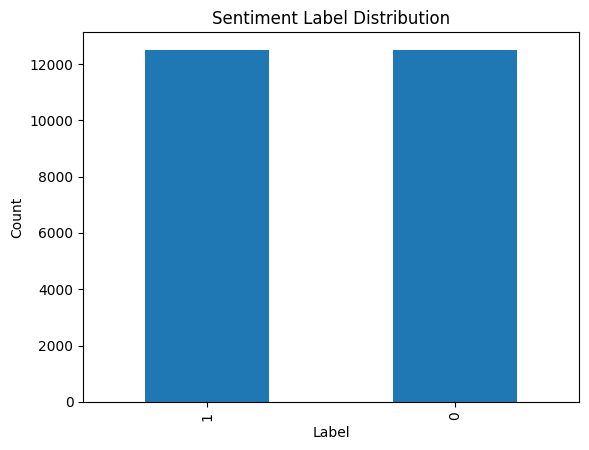

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
### IMPLEMENT YOUR SOLUTION HERE ###
print(dataset)

print(dataset['train'][0])
print(dataset['train'][1])

label_counts = pd.Series([example['label'] for example in dataset['train']])
label_counts.value_counts().plot(kind='bar')
plt.title('Sentiment Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


Now we load the tokenizer for our model using the `AutoTokenizer` from hugging face. After that we tokenize the dataset.

In [26]:
tokenizer = AutoTokenizer.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [27]:
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)

tokenized_datasets = dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

To make a proper training, we split the dataset in train and test data.

In [28]:
train_dataset = tokenized_datasets["train"]
test_dataset = tokenized_datasets["test"]


# to reduce training time you can use the following to select only a subset of the dataset
TRAIN_SUBSET_SIZE = 5000
TEST_SUBSET_SIZE = 1000

train_dataset = train_dataset.shuffle(seed=42).select(range(TRAIN_SUBSET_SIZE))
test_dataset = test_dataset.shuffle(seed=42).select(range(TEST_SUBSET_SIZE))


Now we load the model using the `AutoModel` class `AutoModelForSequenceClassification`:

In [29]:
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


We can now observe the model architecture with the `summary` function from the `torchinfo` framework.

In [30]:
summary(model, depth=3)

Layer (type:depth-idx)                                  Param #
DistilBertForSequenceClassification                     --
├─DistilBertModel: 1-1                                  --
│    └─Embeddings: 2-1                                  --
│    │    └─Embedding: 3-1                              23,440,896
│    │    └─Embedding: 3-2                              393,216
│    │    └─LayerNorm: 3-3                              1,536
│    │    └─Dropout: 3-4                                --
│    └─Transformer: 2-2                                 --
│    │    └─ModuleList: 3-5                             42,527,232
├─Linear: 1-2                                           590,592
├─Linear: 1-3                                           1,538
├─Dropout: 1-4                                          --
Total params: 66,955,010
Trainable params: 66,955,010
Non-trainable params: 0

Now we start defining our LoRA adapter. For this, we define a lora configuration.

In the configuration we need to define the following:
- task_type: The task we want to train our model
- r: The rank of the LoRA adapter ($\Delta W = A B$). We have more trainable parameters when the rank is bigger.
- lora_alpha: The alpha is the scaling factor. This is calculated together with the rank: $$\Delta W = \frac{\alpha}{r} AB$$
- lora_dropout: This defines the amount of dropout we want to use to make the training more robust.
- target_modules: Defines the layers we want to add our adapter to. In this case, we target the attention layers for the LoRA.

After the configuration we need to add the adapter to the model and we can observe the number of trainable paramters vs. the number of non trainable parameters.


In [31]:
lora_config = LoraConfig(
    task_type=TaskType.SEQ_CLS,   # Sequence classification
    r=8,                          # Rank
    lora_alpha=32,                # Scaling factor
    lora_dropout=0.1,             # Dropout
    target_modules=["q_lin", "v_lin"]  # Target attention layers for LoRA
)

# you can experminet with different target modules
# target_modules=[
#     "q_lin", "k_lin", "v_lin",  # Self-attention projections
#     "out_lin",  # Output projection of self-attention
#     "ffn.lin1", "ffn.lin2"  # Feed-forward network layers
# ]

# add adapter to the model
model = get_peft_model(model, lora_config)

# Print trainable parameters
model.print_trainable_parameters()

trainable params: 739,586 || all params: 67,694,596 || trainable%: 1.0925


After that, we define the training arguments and the trainer.

In [45]:
# Define training arguments
training_args = TrainingArguments(
    output_dir="./lora_imdb",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    push_to_hub=False,

)

# Define trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer
)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1594: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
<ipython-input-45-876547736b7e>:17: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
No label_names provided for model class `PeftModelForSequenceClassification`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.


After all that preparation we can now train the adapter on the model.

In [46]:
# Train

trainer.train(resume_from_checkpoint=False)


Epoch,Training Loss,Validation Loss
1,0.254000,0.232029
2,0.267700,0.267480
3,0.224800,0.266505


TrainOutput(global_step=1875, training_loss=0.24588083902994792, metrics={'train_runtime': 591.6764, 'train_samples_per_second': 25.352, 'train_steps_per_second': 3.169, 'total_flos': 2021091102720000.0, 'train_loss': 0.24588083902994792, 'epoch': 3.0})

In [47]:
#trainer.train(resume_from_checkpoint=False)# Save model
trainer.save_model("./lora_sentiment_model")

After saving we can observ the results of our model training using the hugging face evaluation:

In [48]:
results = trainer.evaluate()
print(results)

{'eval_loss': 0.2665053606033325, 'eval_runtime': 15.5293, 'eval_samples_per_second': 64.394, 'eval_steps_per_second': 8.049, 'epoch': 3.0}


#### TASK 5.3

Use the trained model to classify the following example sentences.

1. Load the model and tokenizer from the save directory.
2. Create a pipeline.
3. Classify the example sentences.
4. Print out the results and format the output.


The output per example should look something like this:
```
--------------------------------------------------
Text: I am neutral
Sentiment: Negative
Confidence: 0.5093
```

In [52]:
examples_to_classify = [
    "I love this",
    "I hate this",
    "I am neutral",
    "This movie was really bad. I would not recommend it.",
    "\n",
    "This movie was really bad. I would not recommend it.",
    "I loved this movie! The acting was amazing.",
    "This is no art-house film, it's mainstream entertainment. <br /><br />Lot's of beautiful people, t&a, and action. I found it very entertaining. It's not supposed to be intellectually stimulating, it's a fun film to watch! Jesse and Chace are funny too, which is just gravy. Definitely worth a rental.<br /><br />So in summary, I'd recommend checking it out for a little Friday night entertainment with the boys or even your girl (if she likes to see other girls get it on!)<br /><br />The villains are good too. Vinnie, Corey Large, the hatian guy from Heroes. Very nasty villains.",
    "This film seemed way too long even at only 75 minutes. The problem with jungle horror films is that there is always way too much footage of people walking (through the jungle, up a rocky cliff, near a river or lake) to pad out the running time. The film is worth seeing for the laughable and naked native zombie with big bulging, bloody eyes which is always accompanied on the soundtrack with heavy breathing and lots of reverb. Eurotrash fans will be plenty entertained by the bad English dubbing, gratuitous female flesh and very silly makeup jobs on the monster and native extras. For a zombie/cannibal flick this was pretty light on the gore but then I probably didn't see an uncut version.",
]

### IMPLEMENT YOUR SOLUTION HERE ###

model_dir = "./lora_sentiment_model"
model = AutoModelForSequenceClassification.from_pretrained(model_dir)
model.config.id2label = {0: "Negative", 1: "Positive"}
tokenizer = AutoTokenizer.from_pretrained(model_dir)

classifier = pipeline("text-classification", model=model, tokenizer=tokenizer)

results = classifier(examples_to_classify)

for text, result in zip(examples_to_classify, results):
    print(f"Text: {text}\nSentiment: {result['label']}\nConfidence: {result['score']:.4f}\n")



Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use cuda:0


Text: I love this
Sentiment: Positive
Confidence: 0.9986

Text: I hate this
Sentiment: Negative
Confidence: 0.9543

Text: I am neutral
Sentiment: Positive
Confidence: 0.7039

Text: This movie was really bad. I would not recommend it.
Sentiment: Negative
Confidence: 0.9979

Text: 

Sentiment: Positive
Confidence: 0.5377

Text: This movie was really bad. I would not recommend it.
Sentiment: Negative
Confidence: 0.9979

Text: I loved this movie! The acting was amazing.
Sentiment: Positive
Confidence: 0.9982

Text: This is no art-house film, it's mainstream entertainment. <br /><br />Lot's of beautiful people, t&a, and action. I found it very entertaining. It's not supposed to be intellectually stimulating, it's a fun film to watch! Jesse and Chace are funny too, which is just gravy. Definitely worth a rental.<br /><br />So in summary, I'd recommend checking it out for a little Friday night entertainment with the boys or even your girl (if she likes to see other girls get it on!)<br /><br 

Congrats! You reached the end of the notebook. :)

I hope you have learned something from the notebooks and can now get on with your project tasks.